Logos: 

{'studies': 77, 'percent': 14, 'statistics': 5, 'experts': 5, 'cdc': 111, 'rna': 52, 'fda': 25, 'proven': 16, 'fact': 110}



Ethos: 

{'experience': 15, 'dr.': 331, 'doctor': 51, 'confident': 2, 'as a': 145, 'phd': 2, 'years': 65, 'professional': 7, 'i am': 43, 'i got': 13, "i've been": 8, 'i have': 32}



Pathos: 

{'hate': 19, 'love': 15, 'god': 7, 'jesus': 4, 'christ': 4, 'fucking': 20, '!': 143}



Median Score: 1.0
Median number of Comments 0.0
Average Score: 3.8163403106009453
Average number of Comments 1.925725860904794
STD Score : 31.01296852046532
STD number of Comments: 16.753844628050718


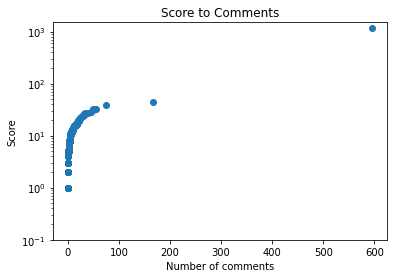

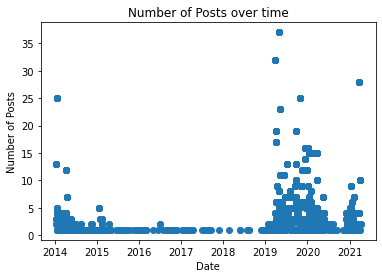

Comments: 1031
total: 1481


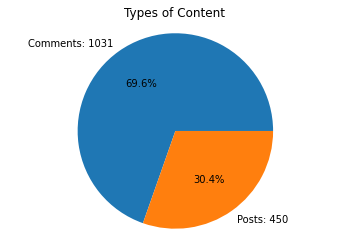

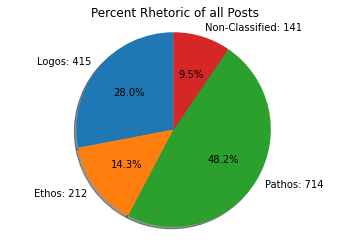

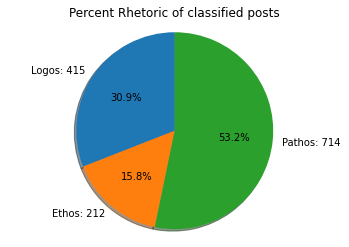

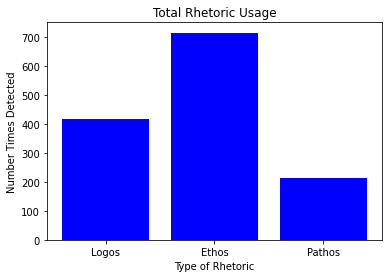

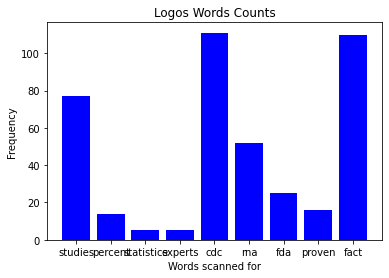

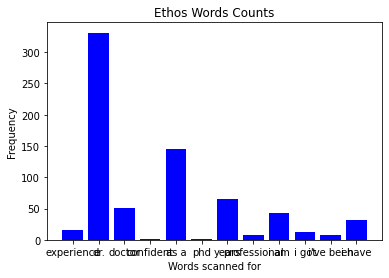

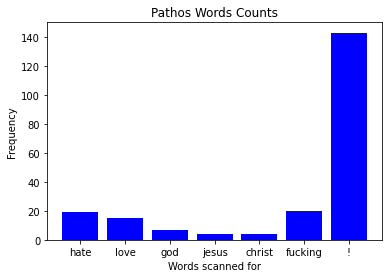

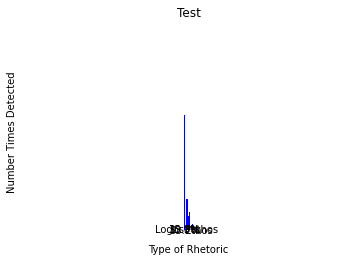

In [26]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import datetime
import sys
import pylab
import re
# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.


import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie


def getKeys(dict):
    return dict.keys()


def getVals(dict):
    return dict.values()

def getCommentCount(arr):
    count = 0
    for i in arr:
        if i == "Comment":
            count +=1

    return count



def getCharts():
    return

    # Score vs Comments Chart
def scoreToCommentsChart(scoreToComments):
    scoreToComments = np.sort(scoreToComments, axis=1)
    fig, ax = plt.subplots()
    ax.set_yscale('log')
    ax.set_xlabel("Number of comments")
    ax.set_ylabel("Score")
    ax.set_ylim([0.1, 1500])
    plt.gca().scatter(scoreToComments[1], scoreToComments[0])
    plt.title("Score to Comments")
    matplotlib.pyplot.show()

def getScoreToCommentsStats(score, comments):
    print("Median Score: " + str(np.median(score)))
    print("Median number of Comments " + str(np.median(comments)))
    print("Average Score: " + str(np.average(score)))
    print("Average number of Comments " + str(np.average(comments)))
    print("STD Score : " + str(np.std(score)))
    print("STD number of Comments: " + str(np.std(comments)))

def postsToTimeChart(timestamp):
    # Posts vs Time chart
    fig, ax = plt.subplots()
    timestamp = [datetime.datetime.strptime(d[:10], "%Y-%m-%d").date() for d in timestamp[1:]]
    timeStamp = np.array(timestamp)
    timecount = np.zeros(timeStamp.shape)
    ax.set_ylabel("Number of Posts")
    ax.set_xlabel("Date")
    count = 0
    for i in timeStamp:
        timecount[count] = np.count_nonzero(timeStamp == i)
        count += 1

    plt.gca().scatter(timeStamp, timecount)
    plt.title("Number of Posts over time")
    matplotlib.pyplot.show()


# Posts vs Comments
def postsToCommentsChart(titles):
    print("Comments: " + str(getCommentCount(titles[1:])))
    print("total: " + str(len(titles[1:])))
    fig, ax = plt.subplots()
    numCommets = getCommentCount(titles[1:])
    labels = 'Comments: ' + str(numCommets), 'Posts: ' + str(len(titles[1:]) - numCommets)
    ax.pie([numCommets, len(titles[1:]) - numCommets], explode=(0, 0), labels=labels, autopct='%1.1f%%')
    ax.axis('equal')
    plt.title("Types of Content")
    plt.show()

def rhetoricCountNonClassifiedChart(body, total, logosCt, ethosCt, pathosCt):
    # pie chart with nonclassified
    labels = 'Logos: ' + str(logosCt), 'Ethos: ' + str(ethosCt), 'Pathos: ' + str(pathosCt), 'Non-Classified: ' + str(
        len(body) - total)
    sizes = [(logosCt / len(body)), (ethosCt / len(body)), (pathosCt / len(body)), (len(body) - total) / len(body)]
    explode = (0, 0, 0, 0)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, normalize=False)
    ax1.axis('equal')
    plt.savefig('mainpie.png', format='png')
    plt.title("Percent Rhetoric of all Posts")
    plt.show()

def rhetoricCountClassifiedChart(body, total, logosCt, ethosCt, pathosCt):
    # pie chart without nonclassified
    labels = 'Logos: ' + str(logosCt), 'Ethos: ' + str(ethosCt), 'Pathos: ' + str(pathosCt)
    sizes = [(logosCt / total), (ethosCt / total), (pathosCt / total)]
    explode = (0, 0, 0)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, normalize=False)
    ax1.axis('equal')
    plt.savefig('mainpie.png', format='png')
    plt.title("Percent Rhetoric of classified posts")
    plt.show()

def totalRhetoricUsageChart(logosCt, ethosCt, pathosCt):
    # Main bar chart
    data = [logosCt, ethosCt, pathosCt]
    plt.bar(["Logos", "Ethos", "Pathos"], data, color="blue")
    plt.xlabel("Type of Rhetoric")
    plt.ylabel("Number Times Detected")
    plt.title("Total Rhetoric Usage")
    plt.savefig('mainbar.png', format='png')
    plt.show()

def rhetoricIndivCountChart(rhetoric, lpe):
    # logos bar chart
    logosKeys = getKeys(rhetoric)
    logosVals = getVals(rhetoric)
    plt.bar(logosKeys, logosVals, color="blue")
    plt.savefig(lpe +'bar.png', format='png')
    plt.title(lpe + " Words Counts")
    plt.ylabel("Frequency")
    plt.xlabel("Words scanned for")
    plt.show()

def getCharts(scoreToComments, timestamp, titles, body, logosCt, pathosCt, ethosCt, logos, ethos, pathos):
    scoreToCommentsChart(scoreToComments)
    postsToTimeChart(timestamp)
    postsToCommentsChart(titles)

    total = (logosCt + pathosCt + ethosCt)
    rhetoricCountNonClassifiedChart(body, total, logosCt, pathosCt, ethosCt)
    rhetoricCountClassifiedChart(body, total, logosCt, pathosCt, ethosCt)
    totalRhetoricUsageChart(logosCt, ethosCt, pathosCt)
    rhetoricIndivCountChart(logos, "Logos")
    rhetoricIndivCountChart(ethos, "Ethos")
    rhetoricIndivCountChart(pathos, "Pathos")


def main():
    import csv
    logos = {"studies": 0, 'percent': 0, 'statistics': 0, 'experts': 0, 'cdc': 0, 'rna' : 0, 'fda' : 0 , 'proven' : 0, 'fact' : 0}
    ethos = {'experience' : 0, 'dr.' : 0, 'doctor' : 0, 'confident' : 0, 'as a' : 0, 'phd' : 0, 'years' : 0, 'professional' : 0,  'i am':0, 'i got': 0, 'i\'ve been': 0, 'i have':0}
    pathos = {'hate': 0, 'love' : 0, 'god' : 0, 'jesus' : 0, 'christ' : 0, "fucking" : 0, '!' : 0}
    logosCt = 0
    ethosCt = 0
    pathosCt = 0
    # and so on
    with open('reddit_vm.csv', mode='r', errors='ignore') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        count = 0
        titles = list()
        score = list()
        ids = list()
        urls = list()
        comments = list()
        created = list()
        timestamp = list()
        body = list()
        # CSV Reader loop; takes csv file and puts data into lists
        for row in csv_reader:
            curr_body = row[6]  # used to filter to just bodies of messages, current format isnt adaptive to multiple
            # data sets unless we specify format. can be removed at time cost
            word_arr = curr_body.split(" ")
            
            titles.append(row[0])
            score.append(row[1])
            ids.append(row[2])
            urls.append(row[3])
            comments.append(row[4])
            created.append(row[5])
            body.append(row[6])
            timestamp.append(row[7])
            for key in logos.keys():
                logos[key] += len(re.findall(key, curr_body.lower()))
                logosCt += len(re.findall(key, curr_body.lower()))
            for key in pathos.keys():
                pathos[key] += len(re.findall(key, curr_body.lower()))
                pathosCt += len(re.findall(key, curr_body.lower()))
            for key in ethos.keys():
                ethos[key] += len(re.findall(key, curr_body.lower()))
                ethosCt += len(re.findall(key, curr_body.lower()))
          #  for word in word_arr:
           #     # logic to look for stuff
            #    word = word.lower()
             #   if logos.__contains__(word):
              #      logos[word] += 1
               #     logosCt+=1
         #       if ethos.__contains__(word):
          #          ethos[word] += 1
           #         ethosCt+=1
            #    if pathos.__contains__(word):
             #       pathos[word] += 1
              #      pathosCt+=1
                    
                    
        
        total = (logosCt + pathosCt + ethosCt)
        print("Logos: \n")
        print(logos)
        print("\n\n")
        print("Ethos: \n")
        print(ethos)
        print("\n\n")
        print("Pathos: \n")
        print(pathos)
        print("\n\n")
        score = [int(i) for i in score[1:]]
        comments = [int(i) for i in comments[1:]]
        scoreToComments = np.array((score[1:], comments[1:]))
        getScoreToCommentsStats(score, comments)
        getCharts(logos, ethos, pathosscoreToComments, timestamp, titles, body, logosCt, pathosCt, ethosCt)
        
        
        #pie chart
        labels = 'Logos', 'Ethos', 'Pathos'
        sizes = [(logosCt / total), (ethosCt / total), (pathosCt / total)]
        explode = (0, 0, 0) 
        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
        ax1.axis('equal') 
        plt.savefig('mainpie.png', format='png')
      #  plt.show()
        
        
        #Main bar chart
        data = [logosCt, ethosCt, pathosCt]
        plt.bar(["Logos", "Ethos", "Pathos"], data, color = "blue")
        plt.xlabel("Type of Rhetoric")
        plt.ylabel("Number Times Detected")
        plt.title("Test")
        plt.savefig('mainbar.png', format='png')
       # plt.show()
        
        
        #logos bar chart
        logosKeys = getKeys(logos)
        logosVals = getVals(logos)
        plt.bar(logosKeys, logosVals, color = "blue")
        plt.savefig('logosbar.png', format='png')
        #plt.show()
        
        #ethos bar chart
        ethosKeys = getKeys(ethos)
        ethosVals = getVals(ethos)
        plt.bar(ethosKeys, ethosVals, color = "blue")
        plt.savefig('ethosbar.png', format='png')
      #  plt.show()
        
        #pathos bar chart
        pathosKeys = getKeys(pathos)
        pathosVals = getVals(pathos)
        plt.bar(pathosKeys, pathosVals, color = "blue")
        plt.savefig('pathosbar.png', format='png')
      #  plt.show()
        

if __name__ == '__main__':
    main()
    
